In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import plotly.graph_objs as go
from statsmodels.tsa.stattools import adfuller
from numpy import log
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import numpy as np
from pmdarima import auto_arima

In [87]:
df = pd.read_excel("D:\Tài liệu ĐH\Đề án thực hành 1\AdidasSalesdata.xlsx")

In [88]:
df

,Retailer,Retailer ID,Invoice Date,Region,State,City,Gender Type,Product Category,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2021-10-26,Northeast,Pennsylvania,Philadelphia,Men,Apparel,55,125,68750.0,24062.50,0.35,Outlet
1,Foot Locker,1185732,2021-10-27,Northeast,Pennsylvania,Philadelphia,Women,Apparel,45,225,101250.0,30375.00,0.30,Outlet
2,Foot Locker,1185732,2021-10-28,Northeast,Pennsylvania,Philadelphia,Men,Street Footwear,45,475,213750.0,117562.50,0.55,Outlet
3,Foot Locker,1185732,2021-10-29,Northeast,Pennsylvania,Philadelphia,Men,Athletic Footwear,45,125,56250.0,19687.50,0.35,Outlet
4,Foot Locker,1185732,2021-10-30,Northeast,Pennsylvania,Philadelphia,Women,Street Footwear,35,175,61250.0,24500.00,0.40,Outlet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,West Gear,1128299,2020-03-14,West,Nevada,Las Vegas,Women,Apparel,56,170,9520.0,1713.60,0.18,Outlet
9644,West Gear,1128299,2020-03-15,West,Nevada,Las Vegas,Men,Street Footwear,20,149,2980.0,1192.00,0.40,Outlet
9645,West Gear,1128299,2020-03-16,West,Nevada,Las Vegas,Men,Athletic Footwear,31,145,4495.0,1123.75,0.25,Outlet
9646,West Gear,1128299,2020-03-17,West,Nevada,Las Vegas,Women,Street Footwear,26,128,3328.0,1397.76,0.42,Outlet


In [89]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Gender Type,Product Category,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2021-10-26,Northeast,Pennsylvania,Philadelphia,Men,Apparel,55,125,68750.0,24062.5,0.35,Outlet
1,Foot Locker,1185732,2021-10-27,Northeast,Pennsylvania,Philadelphia,Women,Apparel,45,225,101250.0,30375.0,0.30,Outlet
2,Foot Locker,1185732,2021-10-28,Northeast,Pennsylvania,Philadelphia,Men,Street Footwear,45,475,213750.0,117562.5,0.55,Outlet
3,Foot Locker,1185732,2021-10-29,Northeast,Pennsylvania,Philadelphia,Men,Athletic Footwear,45,125,56250.0,19687.5,0.35,Outlet
4,Foot Locker,1185732,2021-10-30,Northeast,Pennsylvania,Philadelphia,Women,Street Footwear,35,175,61250.0,24500.0,0.40,Outlet


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Gender Type       9648 non-null   object        
 7   Product Category  9648 non-null   object        
 8   Price per Unit    9648 non-null   int64         
 9   Units Sold        9648 non-null   int64         
 10  Total Sales       9648 non-null   float64       
 11  Operating Profit  9648 non-null   float64       
 12  Operating Margin  9648 non-null   float64       
 13  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), fl

# Kiểm tra giá trị bị thiếu

In [91]:
df.isna().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Gender Type         0
Product Category    0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

# Kiểm tra giá trị trùng lặp

In [92]:
df.duplicated().sum()

0

# Kết hợp các cột giá trị

In [93]:
df['Product Type'] = df['Gender Type'] + "'s " + df['Product Category']

In [94]:
df

,Retailer,Retailer ID,Invoice Date,Region,State,City,Gender Type,Product Category,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Product Type
0,Foot Locker,1185732,2021-10-26,Northeast,Pennsylvania,Philadelphia,Men,Apparel,55,125,68750.0,24062.50,0.35,Outlet,Men's Apparel
1,Foot Locker,1185732,2021-10-27,Northeast,Pennsylvania,Philadelphia,Women,Apparel,45,225,101250.0,30375.00,0.30,Outlet,Women's Apparel
2,Foot Locker,1185732,2021-10-28,Northeast,Pennsylvania,Philadelphia,Men,Street Footwear,45,475,213750.0,117562.50,0.55,Outlet,Men's Street Footwear
3,Foot Locker,1185732,2021-10-29,Northeast,Pennsylvania,Philadelphia,Men,Athletic Footwear,45,125,56250.0,19687.50,0.35,Outlet,Men's Athletic Footwear
4,Foot Locker,1185732,2021-10-30,Northeast,Pennsylvania,Philadelphia,Women,Street Footwear,35,175,61250.0,24500.00,0.40,Outlet,Women's Street Footwear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,West Gear,1128299,2020-03-14,West,Nevada,Las Vegas,Women,Apparel,56,170,9520.0,1713.60,0.18,Outlet,Women's Apparel
9644,West Gear,1128299,2020-03-15,West,Nevada,Las Vegas,Men,Street Footwear,20,149,2980.0,1192.00,0.40,Outlet,Men's Street Footwear
9645,West Gear,1128299,2020-03-16,West,Nevada,Las Vegas,Men,Athletic Footwear,31,145,4495.0,1123.75,0.25,Outlet,Men's Athletic Footwear
9646,West Gear,1128299,2020-03-17,West,Nevada,Las Vegas,Women,Street Footwear,26,128,3328.0,1397.76,0.42,Outlet,Women's Street Footwear


In [95]:
#df.to_excel("Adidas_US_Sales_Dataset_Cleaned1.xlsx", index=False)

# Dự đoán ARIMA

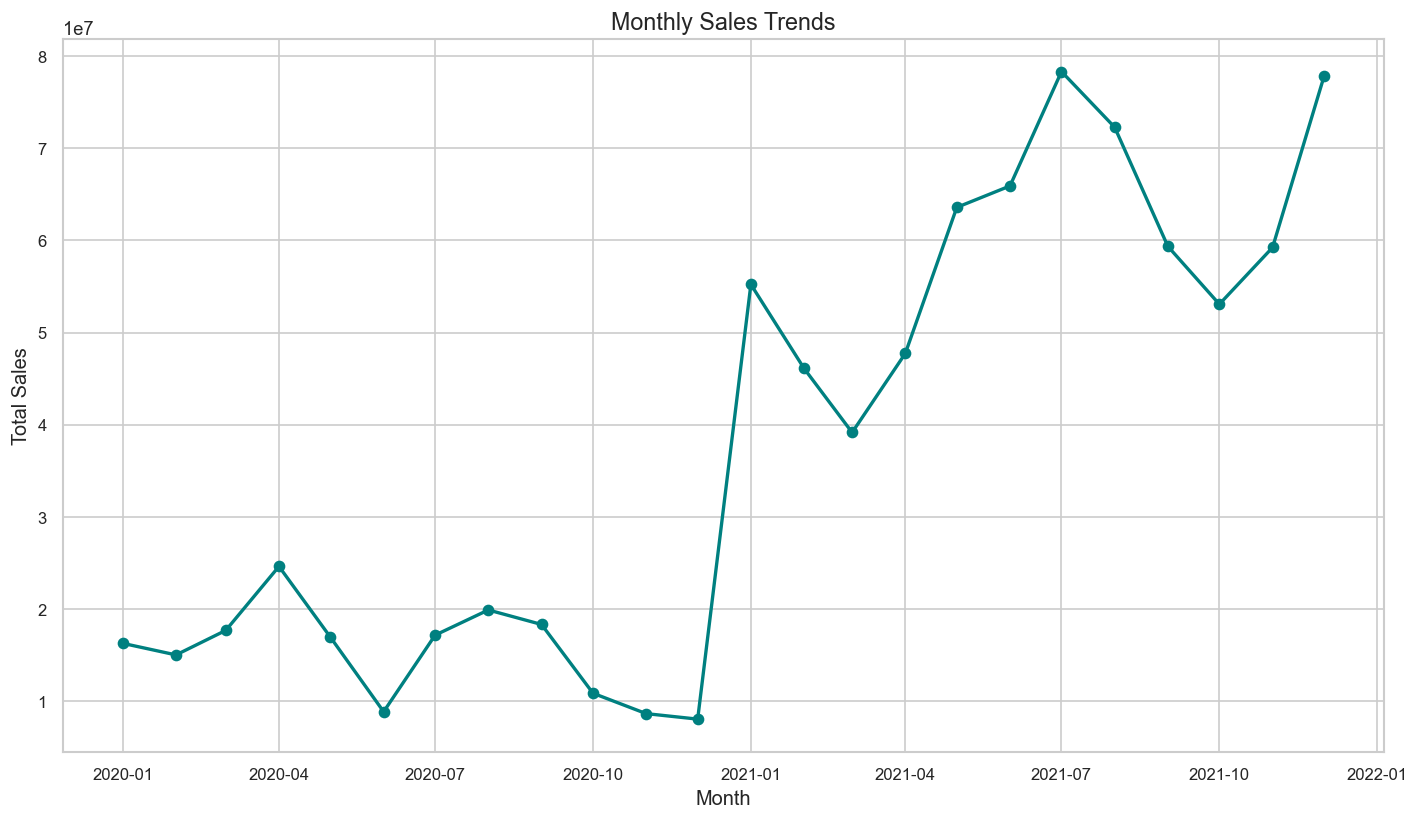

In [110]:
#Group by month and calculate total sales for each month
monthly_sales = df.groupby(df['Invoice Date'].dt.to_period('M'))['Total Sales'].sum()

# Convert the index (which is of type 'Period') to DateTime objects
monthly_sales.index = monthly_sales.index.to_timestamp()

# Setting the style for a more aesthetic plot
sns.set(style="whitegrid")

# Plotting the sales trends over time
plt.figure(figsize=(12, 7))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', color='teal', linestyle='-', linewidth=2)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.title('Monthly Sales Trends', fontsize=14)
plt.xticks(rotation=0)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tight_layout()
plt.show()

In [111]:
monthly_sales

Invoice Date
2020-01-01    16253746.0
2020-02-01    14997988.0
2020-03-01    17660577.0
2020-04-01    24607006.0
2020-05-01    16918014.0
2020-06-01     8829819.0
2020-07-01    17146013.0
2020-08-01    19877980.0
2020-09-01    18304436.0
2020-10-01    10836269.0
2020-11-01     8622300.0
2020-12-01     8026527.0
2021-01-01    55225396.0
2021-02-01    46102165.0
2021-03-01    39148532.0
2021-04-01    47732964.0
2021-05-01    63589681.0
2021-06-01    65917553.0
2021-07-01    78334681.0
2021-08-01    72288221.0
2021-09-01    59357023.0
2021-10-01    53074764.0
2021-11-01    59235040.0
2021-12-01    77815430.0
Freq: MS, Name: Total Sales, dtype: float64

In [112]:
# Calculate the difference between consecutive months for trend analysis
diff = monthly_sales.diff()

# Define the threshold for significant change (seasonality)
seasonality_threshold = 100000

# Check for seasonality
if (diff.abs() > seasonality_threshold).any():
    print("These sales follow seasonality.")
else:
    print("These sales do not follow a seasonality.")
    
# Check for trend
if (diff>0).all() :
    print("There is an increasing trend in sales.")
elif (diff < 0).all():
    print("There is a decreasing trend in sales.")
else:
    print("There is no consistent trend in sales.")

These sales follow seasonality.
There is no consistent trend in sales.


In [113]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(monthly_sales.dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -0.8391906168655261
p-value: 0.8073382697223421


In [117]:
stepwise_fit = auto_arima(monthly_sales, trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=828.310, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=821.182, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=823.076, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=823.094, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=820.225, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=825.010, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.113 seconds


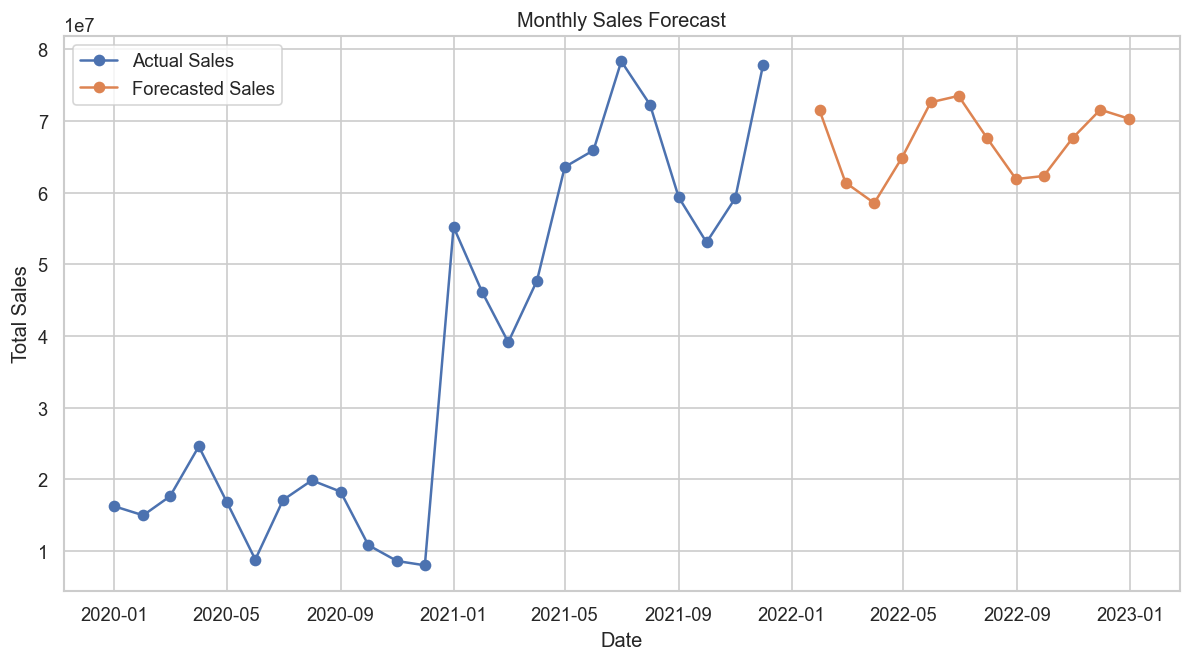

In [123]:
# Fit the ARIMA model to the data
model = ARIMA(monthly_sales, order=(2,1,2))  # Order: (p, d, q)
model_fit = model.fit()

# Make predictions for the next 6 months
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

#Visualize the actual sales data and the forecasted values for the next months.
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', label='Actual Sales')
plt.plot(pd.date_range(start=monthly_sales.index[-1], periods=forecast_steps+1, freq='M')[1:], forecast, marker='o', label='Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Forecast')
plt.legend()
plt.xticks(rotation=0)
plt.grid(True)
plt.show()